# Air Pressure data from Weather News

In [1]:
import pandas as pd

df = pd.read_csv('./data/soratena_tonga.csv')
df.head()

,SoratenaID,DATE(UTC),ARPRSS,SoratenaName,LATD,LOND
0,1001,2022-01-15 11:00:00,997.7,鶴居タンチョウパパ,43.226,144.309
1,1001,2022-01-15 11:01:00,997.7,鶴居タンチョウパパ,43.226,144.309
2,1001,2022-01-15 11:02:00,997.8,鶴居タンチョウパパ,43.226,144.309
3,1001,2022-01-15 11:03:00,997.8,鶴居タンチョウパパ,43.226,144.309
4,1001,2022-01-15 11:04:00,997.9,鶴居タンチョウパパ,43.226,144.309


In [2]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(data=df,geometry=gpd.points_from_xy(df['LOND'],df['LATD']))

<AxesSubplot:>

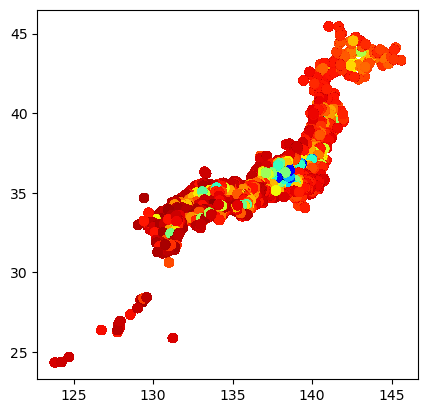

In [3]:
import matplotlib.style as mpls
mpls.use('default')

gdf.plot(column='ARPRSS',cmap='jet')

In [4]:
df.describe()

,SoratenaID,ARPRSS,LATD,LOND
count,764935.000000,764935.000000,764935.000000,764935.000000
mean,21404.936413,1000.603509,35.887148,136.873705
std,13172.020942,27.311418,2.783114,3.646831
min,1001.000000,828.700000,24.330000,123.819000
25%,11073.000000,995.400000,34.435000,134.238000
50%,21056.000000,1010.500000,35.383000,137.189000
75%,32014.000000,1016.700000,36.539000,139.798000
max,47039.000000,1032.500000,45.448000,145.582000


In [5]:
onepoint = df[df.SoratenaID == 1001]
onepoint.head()

,SoratenaID,DATE(UTC),ARPRSS,SoratenaName,LATD,LOND,geometry
0,1001,2022-01-15 11:00:00,997.7,鶴居タンチョウパパ,43.226,144.309,POINT (144.30900 43.22600)
1,1001,2022-01-15 11:01:00,997.7,鶴居タンチョウパパ,43.226,144.309,POINT (144.30900 43.22600)
2,1001,2022-01-15 11:02:00,997.8,鶴居タンチョウパパ,43.226,144.309,POINT (144.30900 43.22600)
3,1001,2022-01-15 11:03:00,997.8,鶴居タンチョウパパ,43.226,144.309,POINT (144.30900 43.22600)
4,1001,2022-01-15 11:04:00,997.9,鶴居タンチョウパパ,43.226,144.309,POINT (144.30900 43.22600)


<AxesSubplot:xlabel='DATE(UTC)'>

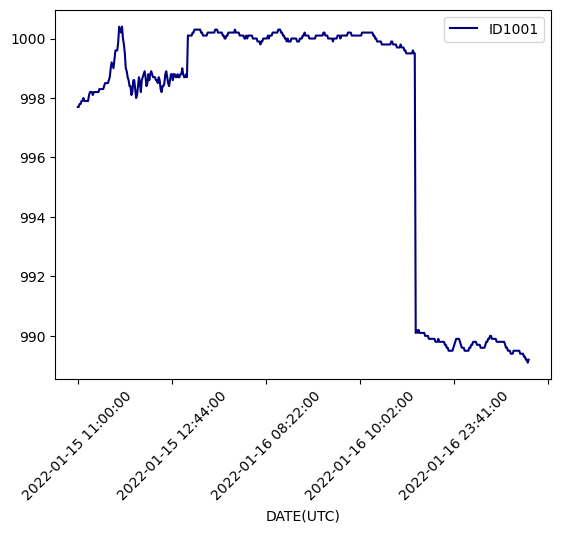

In [6]:
onepoint.plot('DATE(UTC)','ARPRSS',label='ID1001',cmap='jet',rot=45)

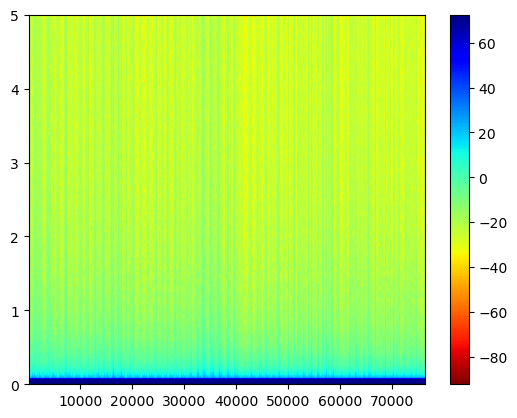

In [ ]:
import matplotlib.pyplot as plt

dt = 0.1
plt.specgram(df['ARPRSS'].to_numpy(),NFFT=256,Fs=1/dt,noverlap=10,cmap='jet_r')
plt.colorbar()
plt.show()

# Tsunami waveform

In [102]:
dft = pd.read_csv('./data/points.csv',names=['time','p1','p2'])
dft.head()

,time,p1,p2
0,0.1,0.002,-0.001
1,0.2,0.002,-0.001
2,0.3,0.002,-0.001
3,0.4,0.002,-0.001
4,0.5,0.002,-0.001


<AxesSubplot:>

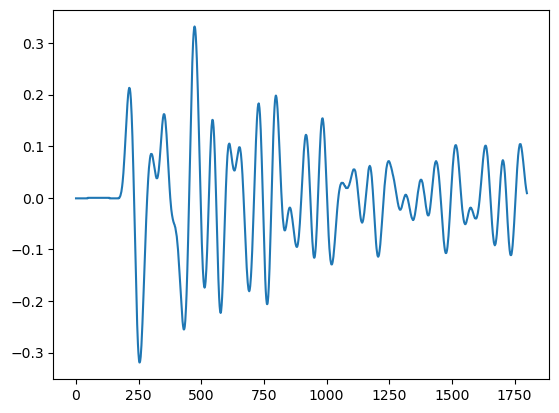

In [103]:
dft.p2.plot()

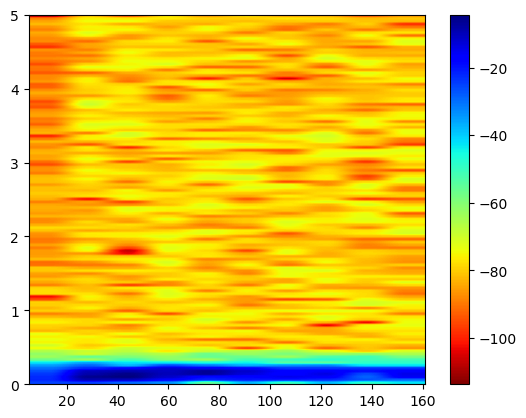

In [105]:
import matplotlib.pyplot as plt

x = dft['p2'].to_numpy()
dt = 0.1
plt.specgram(x,NFFT=256,Fs=1/dt,noverlap=100,cmap='jet_r')
plt.colorbar()
plt.show()

# Other options

import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

x = dft['p2'].to_numpy()

fig, ax = plt.subplots(2, figsize=(8, 7))
f, t, Sxx = signal.spectrogram(x, fs=10,window=('tukey',0.25),scaling='spectrum',mode='phase')
ax[0].pcolormesh(t, f, Sxx,cmap='jet_r')
ax[0].set_ylabel('Frequency [Hz]')
ax[0].set_xlabel('Time [sec]')

#### Note, if using output that is not one sided, then use the following:
f, t, Sxx = signal.spectrogram(x, fs=10, return_onesided=False)
ax[1].pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0))
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_xlabel('Time [sec]')
plt.savefig("fig.png")
plt.show()

def plot_point(df,id):
    df.plot(ax=ax,x='DATE(UTC)',y='ARPRSS',label=id,cmap='jet',rot=45)
    

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for i in df.SoratenaID.unique():
    tdf = df[df.SoratenaID == i]
    plot_point(tdf,i)

import seaborn as sns

sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="DATE(UTC)", y="ARPRSS", data=df, hue='ARPRSS')